In [71]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [72]:
df= pd.read_csv("EV_Dataset.csv")

In [73]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [74]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [75]:
df.dtypes

Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [77]:
df.shape

(96845, 8)

In [78]:
# missing values
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [79]:
df['Vehicle_Class'].unique()

array(['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
       'ARTICULATED VEHICLE', 'BUS', 'CASH VAN', 'CRANE MOUNTED VEHICLE',
       'EDUCATIONAL INSTITUTION BUS', 'EXCAVATOR (COMMERCIAL)',
       'FORK LIFT', 'GOODS CARRIER', 'HARVESTER', 'MAXI CAB',
       'M-CYCLE/SCOOTER', 'MOTOR CAB', 'MOTOR CAR', 'OMNI BUS',
       'PRIVATE SERVICE VEHICLE', 'RECOVERY VEHICLE',
       'THREE WHEELER (PASSENGER)', 'TRACTOR (COMMERCIAL)',
       'TRAILER (AGRICULTURAL)', 'TRAILER (COMMERCIAL)',
       'TRAILER FOR PERSONAL USE', 'VEHICLE FITTED WITH RIG',
       'CAMPER VAN / TRAILER',
       'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)', 'DUMPER',
       'EXCAVATOR (NT)', 'MOPED', 'THREE WHEELER (PERSONAL)',
       'THREE WHEELER (GOODS)', 'EARTH MOVING EQUIPMENT',
       'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
       'CONSTRUCTION EQUIPMENT VEHICLE', 'M-CYCLE/SCOOTER-WITH SIDE CAR',
       'MOBILE WORKSHOP', 'OMNI BUS (PRIVATE USE)',
       'VEHICLE FITTED WITH COMPRESSOR',
       'CAMPER

In [80]:
# Checking for duplicates
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_7204\3912073917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Vehicle_Type", order=df["Vehicle_Type"].value_counts().index, palette="coolwarm")


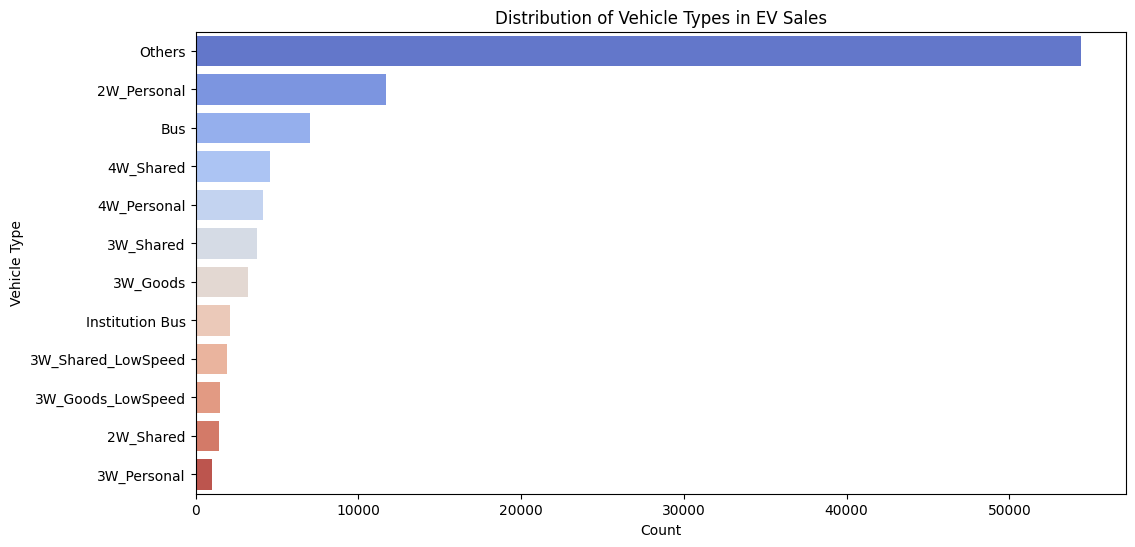

In [81]:
# Vehicle Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Vehicle_Type", order=df["Vehicle_Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Vehicle Types in EV Sales")
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.show()

In [82]:
df['Date'] = pd.to_datetime(df['Date'])


<Axes: ylabel='count'>

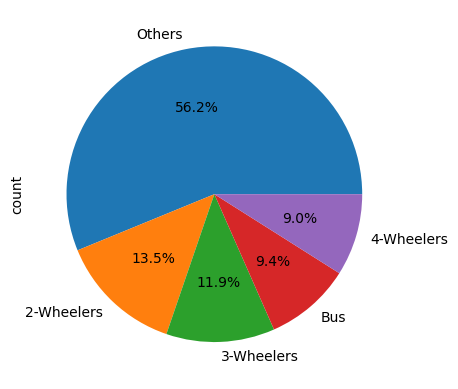

In [83]:
df['Vehicle_Category'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')




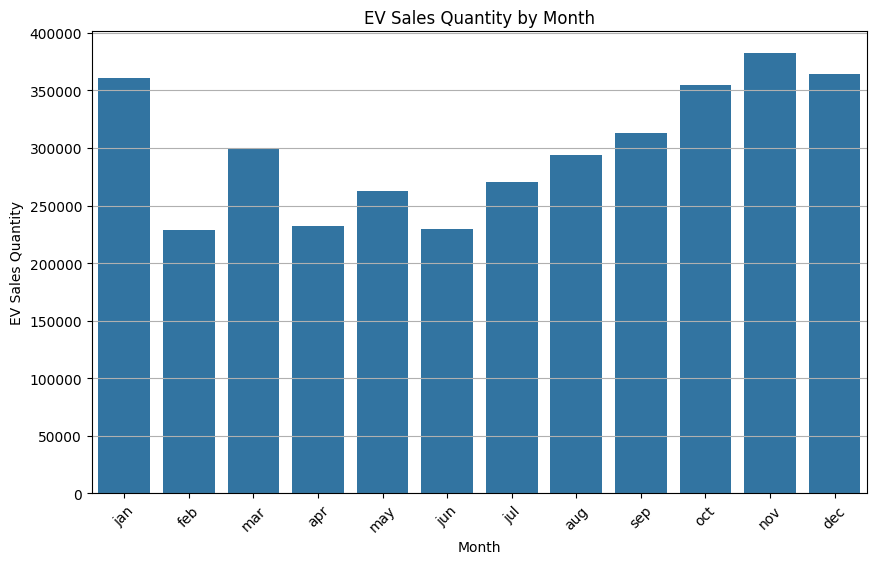

In [84]:
# EV Sales Quantity by Month


plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Month_Name', y='EV_Sales_Quantity',  estimator=sum, errorbar=None)

plt.title('EV Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

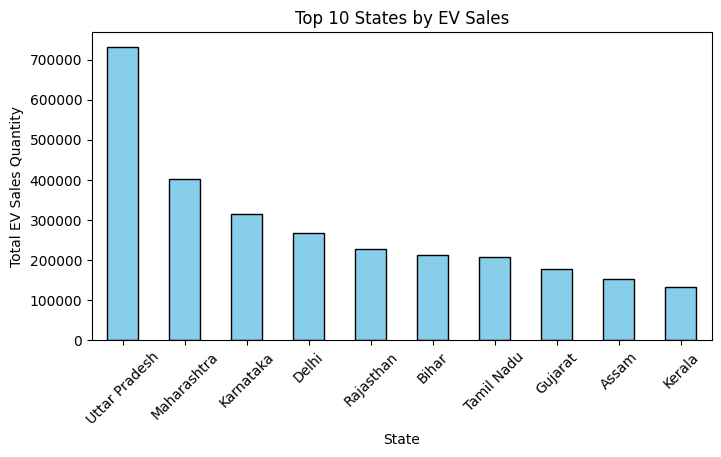

In [101]:
# Aggregating sales by state
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_states.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 States by EV Sales')
plt.xlabel('State')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=45)
plt.show()

**Clustering the segments**

In [87]:
# Import necessary libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [88]:
# Group by 'State' and aggregate 'Electric_Vehicle_Sales_Quantity'
ev_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()


In [89]:
# Impute missing values in Electric_Vehicle_Sales_Quantity 
imputer = SimpleImputer(strategy='mean')
ev_sales['EV_Sales_Quantity'] = imputer.fit_transform(ev_sales[['EV_Sales_Quantity']])


In [90]:
# Scaling and normalize EV sales quantity 
scaler = StandardScaler()
ev_sales['EV_Sales_Quantity_Scaled'] = scaler.fit_transform(ev_sales[['EV_Sales_Quantity']])

In [91]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for num_clusters in k_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
    kmeans.fit(ev_sales[['EV_Sales_Quantity_Scaled']])
    inertia.append(kmeans.inertia_)

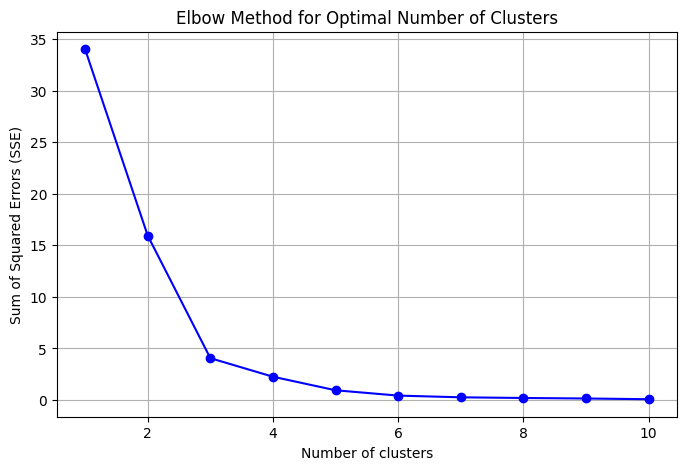

In [92]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [93]:
# Choose the optimal number of clusters
optimal_k  = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k , init='k-means++', random_state=0)
ev_sales['cluster_label'] = kmeans.fit_predict(ev_sales[['EV_Sales_Quantity_Scaled']])



In [94]:
# Evaluate the clusters quality using silhouette score
silhouette_avg_score = silhouette_score(ev_sales[['EV_Sales_Quantity_Scaled']], ev_sales['cluster_label'])
print(f'Silhouette Score for {optimal_k } clusters: {silhouette_avg_score}')



Silhouette Score for 3 clusters: 0.6660969359143741


In [95]:
# Display cluster assignments
print("Cluster Labels for States:\n", ev_sales['cluster_label'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

Cluster Labels for States:
 cluster_label
0    25
2     8
1     1
Name: count, dtype: int64
Inertia: 4.063141465772248
Iterations: 5


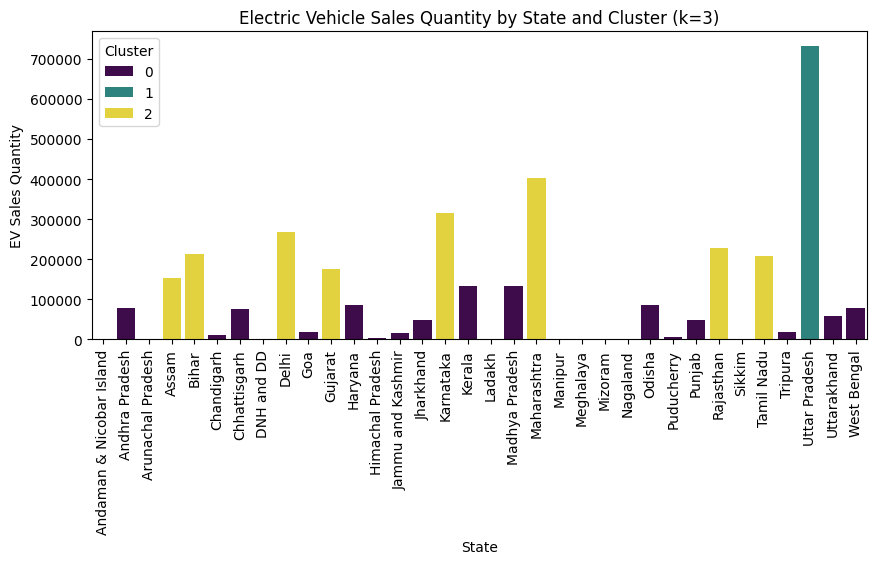

In [106]:
# Plot the clustered states by EV sales quantity
plt.figure(figsize=(10, 4))
sns.barplot(data=ev_sales, x='State', y='EV_Sales_Quantity', hue='cluster_label', palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Electric Vehicle Sales Quantity by State and Cluster (k={optimal_k })')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()

In [97]:
# Analyze cluster segments
cluster_mean_sales = ev_sales.groupby('cluster_label')['EV_Sales_Quantity'].mean().reset_index()
print(cluster_mean_sales)

   cluster_label  EV_Sales_Quantity
0              0          35943.840
1              1         732074.000
2              2         245392.625


C:\Users\DELL\AppData\Local\Temp\ipykernel_7204\3494679690.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster_label', y='EV_Sales_Quantity', data=cluster_mean_sales, palette="viridis")


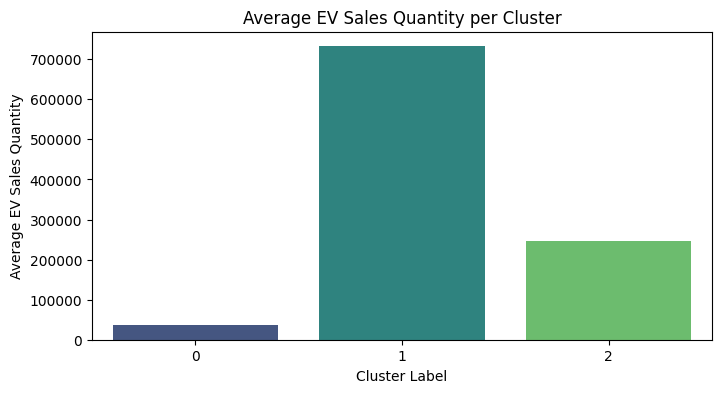

In [98]:

# Creating the cluster mean sales DataFrame
cluster_mean_sales = pd.DataFrame({
    'cluster_label': [0, 1, 2],
    'EV_Sales_Quantity': [35943.840, 732074.000, 245392.625]
})

# Setting up the figure
plt.figure(figsize=(8, 4))
sns.barplot(x='cluster_label', y='EV_Sales_Quantity', data=cluster_mean_sales, palette="viridis")


plt.xlabel("Cluster Label")
plt.ylabel("Average EV Sales Quantity")
plt.title("Average EV Sales Quantity per Cluster")
plt.xticks(rotation=0)

# Display the chart
plt.show()
